In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_classification

1. `make_data` is a function that generates synthetic classification data with specified class separation using scikit-learn's `make_classification`.
2. It creates a dataset (`X`) with 50,000 samples, 2 features, no redundant features, 1 cluster per class, and a specified class separation (`sep`).
3. The dataset is imbalanced with 99.5% of samples belonging to one class and 0.5% to the other.
4. The function returns the feature matrix `X` as a pandas DataFrame and the target variable `y` as a pandas Series.

In [3]:
def make_data(sep):
    x, y = make_classification(n_samples=50000,
                           n_features=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           weights=[0.995],
                           class_sep=sep,
                           random_state=1)
    
    x = pd.DataFrame(X, columns =['feature_1', 'feature_2'])
    y = pd.Series(y)
    
    return x, y

1. Imports the `Counter` class from the `collections` module.
2. Sets the separation parameter to 2.
3. Calls the `make_data` function with the specified separation to generate synthetic classification data.
4. Prints the count of unique values in the target variable `y` using `value_counts()` from pandas.
   - This provides information about the distribution of classes in the generated dataset.

0    49498
1      502
dtype: int64


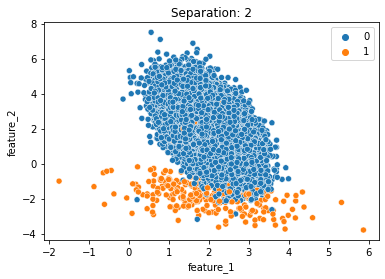

In [11]:
from collections import Counter

separation=2
x, y = make_data(separation)
print(y.value_counts()) 
sns.scatterplot(
    data = x, x = "feature_1", y = "feature_2", hue = y
)
plt.title('Separation: {}'.format(separation))
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40000, 2), (10000, 2), (40000,), (10000,))

In [7]:
print('Train data: ', Counter(y_train))
print('Test data: ', Counter(y_test))

Train data:  Counter({0: 39598, 1: 402})
Test data:  Counter({0: 9900, 1: 100})


In [8]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state = 0, max_iter = 2000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [9]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      9900
           1       0.94      0.17      0.29       100

    accuracy                           0.99     10000
   macro avg       0.97      0.58      0.64     10000
weighted avg       0.99      0.99      0.99     10000



Imbalanced classification report using the `classification_report_imbalanced` function from the `imblearn.metrics` module. It is typically used for evaluating the performance of a classification model on imbalanced datasets. The report includes metrics such as precision, recall, and F1-score, specifically designed for imbalanced classification problems. The `y_test` represents the true labels, and `y_pred` represents the predicted labels from your classification model.

In [10]:
from imblearn.metrics import classification_report_imbalanced

print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      1.00      0.17      1.00      0.41      0.18      9900
          1       0.94      0.17      1.00      0.29      0.41      0.16       100

avg / total       0.99      0.99      0.18      0.99      0.41      0.18     10000

